<a href="https://colab.research.google.com/github/AriesRmd/Temu-Kembali-Citra/blob/master/Tugas_5_TKC_(076_055).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Color Correction

In [26]:
from imutils.perspective import four_point_transform
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [39]:
def plt_imshow(title, image):
  
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [40]:
def find_color_card(image):

	arucoDict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)
	arucoParams = cv2.aruco.DetectorParameters_create()
	(corners, ids, rejected) = cv2.aruco.detectMarkers(image,
		arucoDict, parameters=arucoParams)


	try:
	
		ids = ids.flatten()

		i = np.squeeze(np.where(ids == 923))
		topLeft = np.squeeze(corners[i])[0]

		i = np.squeeze(np.where(ids == 1001))
		topRight = np.squeeze(corners[i])[1]

		i = np.squeeze(np.where(ids == 241))
		bottomRight = np.squeeze(corners[i])[2]

		i = np.squeeze(np.where(ids == 1007))
		bottomLeft = np.squeeze(corners[i])[3]

	# we could not find color correction card, so gracefully return
	except:
		return None

	cardCoords = np.array([topLeft, topRight,
		bottomRight, bottomLeft])
	card = four_point_transform(image, cardCoords)


	return card

In [41]:
args = {
    "reference": "/content/303.jpg",
    "input": "/content/306.jpg"
}

[INFO] loading images...


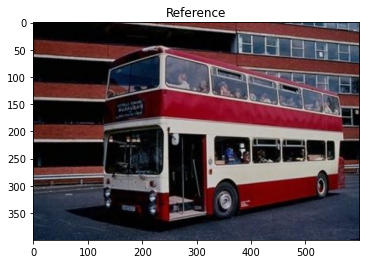

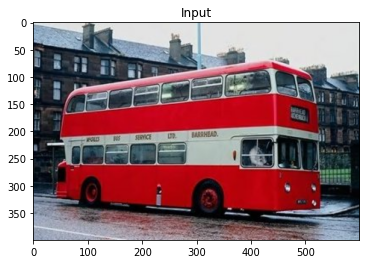

In [42]:
print("[INFO] loading images...")
ref = cv2.imread(args["reference"])
image = cv2.imread(args["input"])

# resize
ref = imutils.resize(ref, width=600)
image = imutils.resize(image, width=600)

# tampilkan gambar
plt_imshow("Reference", ref)
plt_imshow("Input", image)


In [43]:
#mencari warna yang sama
print("[INFO] finding color matching cards...")
refCard = find_color_card(ref)
imageCard = find_color_card(image)

if refCard is None or imageCard is None:
	print("[INFO] could not find color matching card in both images")

[INFO] finding color matching cards...
[INFO] could not find color matching card in both images


Gamma Correction

In [45]:
from matplotlib import pyplot as plt
from __future__ import print_function
import numpy as np
import argparse
import cv2

In [46]:
def plt_imshow(title, image):
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [47]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")

	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

In [72]:
args = {
	"image": "/content/142.jpg"
}

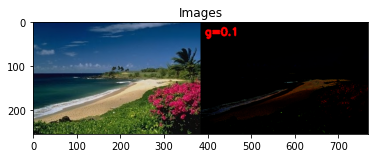

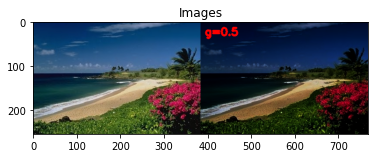

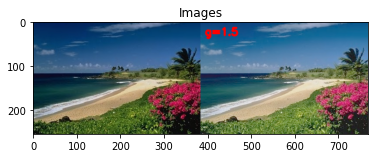

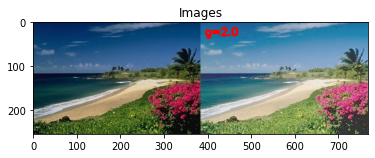

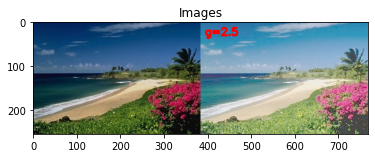

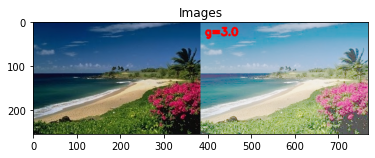

In [73]:
original = cv2.imread(args["image"])

# loop over various values of gamma
for gamma in np.arange(0.0, 3.5, 0.5):
	# ignore when gamma is 1 (there will be no change to the image)
	if gamma == 1:
		continue

	# apply gamma correction and show the images
	gamma = gamma if gamma > 0 else 0.1
	adjusted = adjust_gamma(original, gamma=gamma)
	cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
	plt_imshow("Images", np.hstack([original, adjusted]))

Histogram

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

In [75]:
def plt_imshow(title, image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [76]:
def plot_histogram(image, title, mask=None):
	chans = cv2.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Bins")
	plt.ylabel("# of Pixels")

	# looping
	for (chan, color) in zip(chans, colors):
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color=color)
		plt.xlim([0, 256])

	plt.show()

In [77]:
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [78]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

(0.0, 256.0)

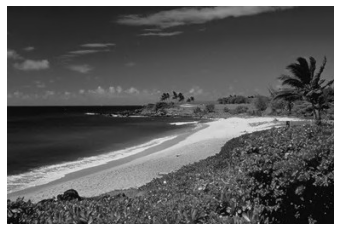

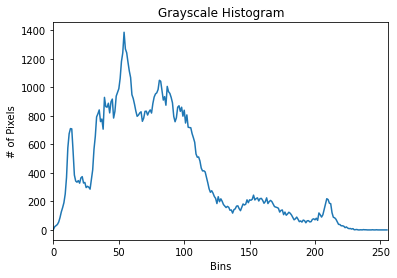

In [79]:
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

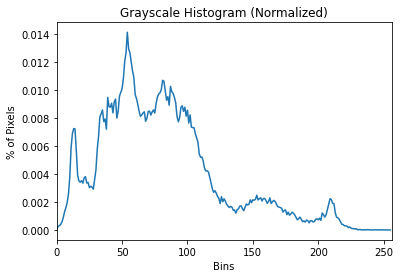

In [80]:
hist /= hist.sum()

# plot the normalized histogram
plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [81]:
image = cv2.imread(args["image"])

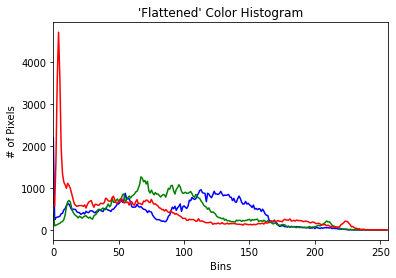

In [82]:
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# looping
for (chan, color) in zip(chans, colors):
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

2D histogram shape: (32, 32), with 1024 values


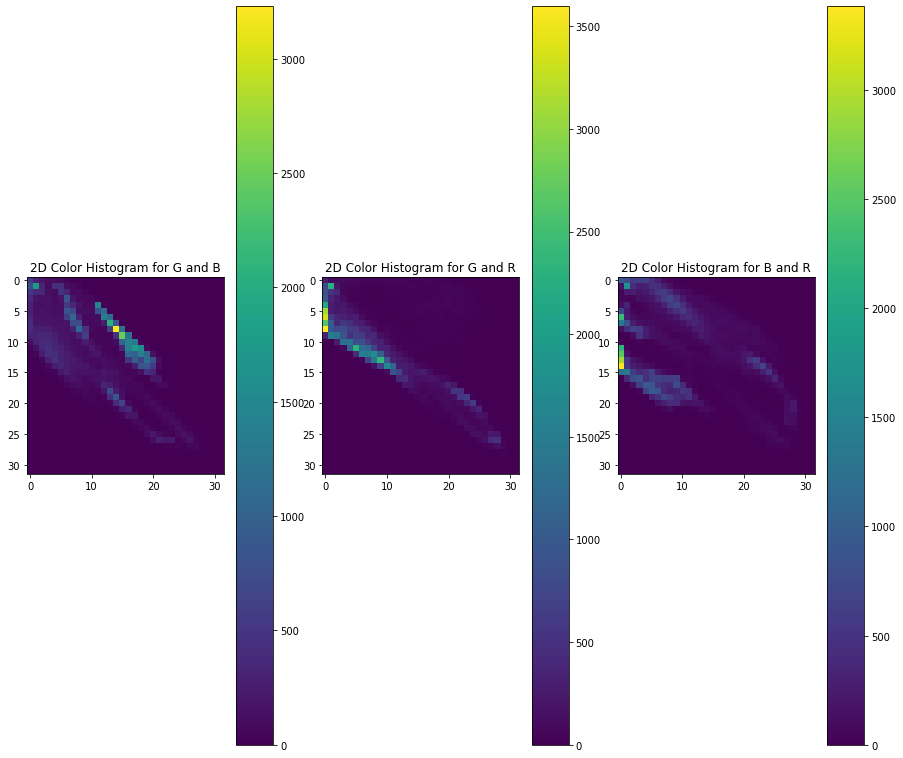

In [83]:
fig = plt.figure(figsize=(15, 25))
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# plot a 2D color histogram for the green and red channels
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# plot a 2D color histogram for blue and red channels
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

In [84]:
hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


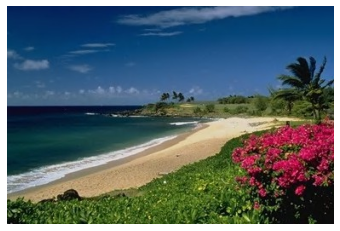

In [85]:
plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))

# show our plots
plt.show()

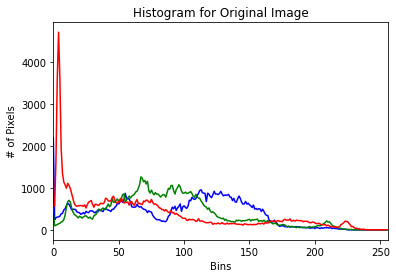

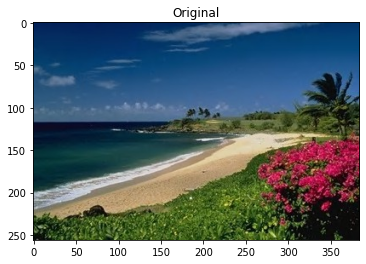

In [86]:
plot_histogram(image, "Histogram for Original Image")
plt_imshow("Original", image)

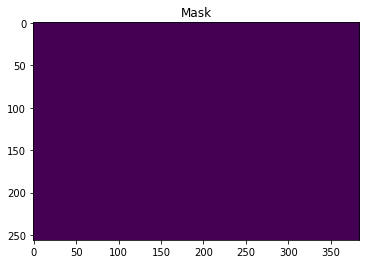

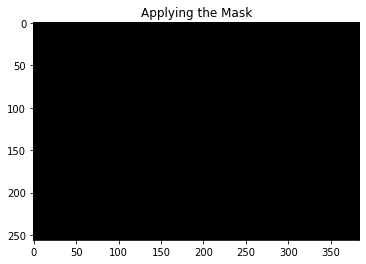

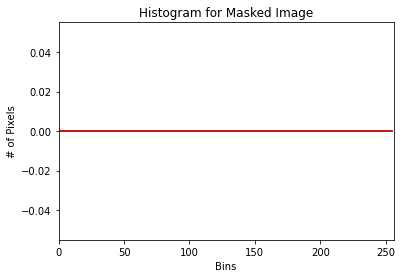

In [87]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 290), (210, 390), 255, -1)
plt_imshow("Mask", mask)

# masked
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Applying the Mask", masked)

plot_histogram(image, "Histogram for Masked Image", mask=mask)

# tampilkan
plt.show()

Histogram Equalization

In [88]:
import matplotlib.pyplot as plt
import argparse
import cv2

In [95]:
def plt_imshow(title, image):
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [90]:
args = {
    "image": "/content/142.jpg"
}

In [96]:
print("[INFO] loading input image...")
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print("[INFO] performing histogram equalization...")
equalized = cv2.equalizeHist(gray)

[INFO] loading input image...
[INFO] performing histogram equalization...


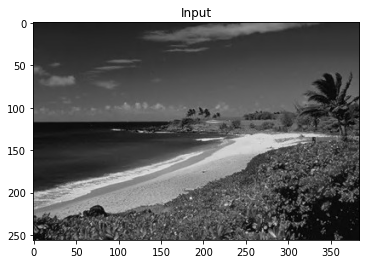

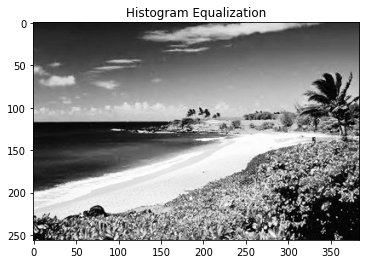

In [97]:
plt_imshow("Input", gray)
plt_imshow("Histogram Equalization", equalized)

In [98]:
args = {
    "image": "/content/142.jpg",
    "clip": 2.0,
    "tile": 8
}

In [99]:
print("[INFO] loading input image...")
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print("[INFO] applying CLAHE...")
clahe = cv2.createCLAHE(clipLimit=args["clip"],
	tileGridSize=(args["tile"], args["tile"]))
equalized = clahe.apply(gray)


[INFO] loading input image...
[INFO] applying CLAHE...


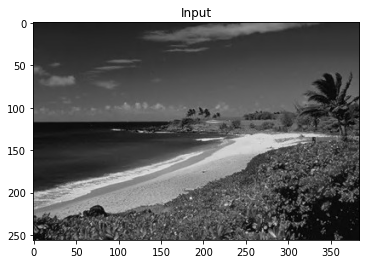

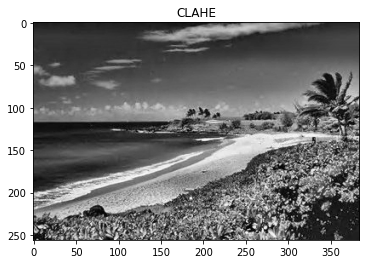

In [100]:
plt_imshow("Input", gray)
plt_imshow("CLAHE", equalized)

Histogram Matching

In [101]:
from skimage import exposure
import matplotlib.pyplot as plt
import argparse
import cv2

In [102]:
def plt_imshow(title, image):
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [109]:
args = {
    "source": "/content/826.jpg",
    "reference": "/content/806.jpg"
}

[INFO] loading source and reference images...
[INFO] performing histogram matching...


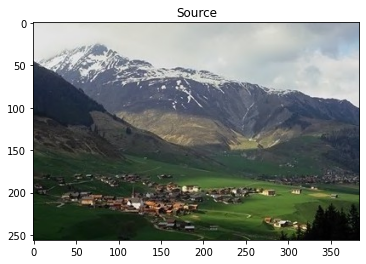

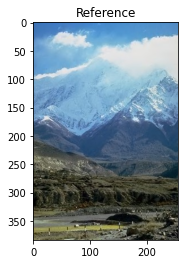

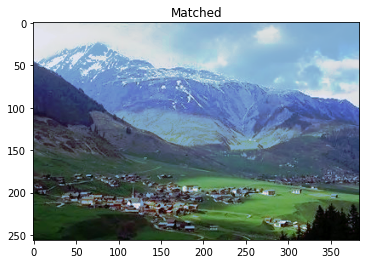

In [110]:
print("[INFO] loading source and reference images...")
src = cv2.imread(args["source"])
ref = cv2.imread(args["reference"])

# determine if we are performing multichannel histogram matching
# and then perform histogram matching itself
print("[INFO] performing histogram matching...")
multi = True if src.shape[-1] > 1 else False
matched = exposure.match_histograms(src, ref, multichannel=multi)

# show the output images
plt_imshow("Source", src)
plt_imshow("Reference", ref)
plt_imshow("Matched", matched)

Text(0.5, 1.0, 'Matched')

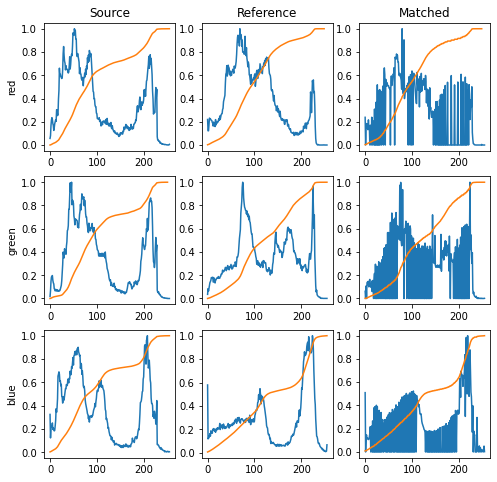

In [111]:
(fig, axs) =  plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for (i, image) in enumerate((src, ref, matched)):
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	for (j, color) in enumerate(("red", "green", "blue")):
		(hist, bins) = exposure.histogram(image[..., j],
			source_range="dtype")
		axs[j, i].plot(bins, hist / hist.max())

		(cdf, bins) = exposure.cumulative_distribution(image[..., j])
		axs[j, i].plot(bins, cdf)

		axs[j, 0].set_ylabel(color)

axs[0, 0].set_title("Source")
axs[0, 1].set_title("Reference")
axs[0, 2].set_title("Matched")